# Algerian Forest Fires Dataset

## Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attributes and 1 output attribute (class). The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

## Attribute Information:

1. Date: (DD/MM/YYYY) Day, month ('June' to 'September'), year (2012) Weather data observations
2. Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH: Relative Humidity in %: 21 to 90
4. Ws: Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

### FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# WE HAVE TO PREDICT FWI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 = pd.read_csv(r'D:\Programming\Study\Machine Learning\Datasets\Algerian_forest_fires_dataset_UPDATE.csv')
#Here the column names will we consider as the empty as the 0th row is empty so we will not have any column names 
# so we have to specify colunm name with header argumnet 
df_1.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [3]:
df = pd.read_csv(r'D:\Programming\Study\Machine Learning\Datasets\Algerian_forest_fires_dataset_UPDATE.csv',header = 1)
#Marking the row we want to treat as header(columns name)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning


In [5]:
#Checking any missing values
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### As we can see above the Sidi-Bel Abbes Region row is empty as it a heanding and in row no. 167 one Classs is missing
#### we engulfed te df.isnull().any(axis=1) in df[] so that it will show us the rows which are giving True for missing or null values


#### The Dataset is divided into two sets based on the Region from 122th index we can make a new column basedon the region
#### 1.Bajaia Region Dataset
#### 2.Sidi-Bel Abbes Region Dataset - 0 For this
#### By adding new colunm with region - 1 for this

In [6]:
df.loc[:122,'Region'] = 0 # Here :122 mean till 122th row
df.loc[122:,'Region'] = 1 # Here 122: means from 122th row onward
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


##### As we can see a region column has been added to the dataset


In [7]:
df[['Region']]=df[['Region']].astype(int)
#Originaly Region was a Float but we dont want it to take much space so we have coverted it to int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [8]:
#Removing rows containing Null values
df = df.dropna().reset_index(drop=True)#The dropna() function in Python’s pandas library is used to remove missing (null/NaN) values from a DataFrame or Series. It's an essential tool for cleaning datasets, especially during Exploratory Data Analysis (EDA).
# Parameters
# axis: Specifies whether to drop rows or columns.
# axis=0 (default): Drop rows containing missing values.
# axis=1: Drop columns containing missing values.

# how: Determines whether to drop rows/columns based on how many missing values they contain.
# 'any' (default): Drops a row/column if it contains at least one missing value.
# 'all': Drops a row/column only if all its values are missing.

# thresh: Specifies the minimum number of non-NA values required to retain a row/column.
# Example: thresh=2 retains rows/columns with at least 2 non-NA values.

# subset: A list of column/row labels to consider when checking for missing values.
# Example: subset=['col1', 'col2'] checks for missing values only in col1 and col2.

# inplace: Whether to modify the original DataFrame or return a new one.
# False (default): Returns a new DataFrame.
# True: Modifies the original DataFrame.


### reset_index(drop=True) Reseting the index of dataset after removing null values drop = True means True: The index is reset but not added as a new column.

In [9]:

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Now as we can see that we have zero null values in our dataset

In [10]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [11]:
df = df.drop(122).reset_index(drop=True)

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

#### Here as we can see some column names have extra spaces in them 
#### Now there is no problem if there is extra spaces in column name but it is a good practise to remove the extra spaces in EDA

In [14]:
##Fixing the extra space in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

##### Now we can see that tehre are no extra white spaces in the columns name


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


#### As we can see above most of the columns are of object data type but all of them contain integers and float values so let covert the datatype of required columns

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
##FIRST METHOD
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [18]:
##SECOND METHOD
objects = [column for column in df.columns if df[column].dtype == 'O'] # O means object (This is list comprehension method)
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


#### Lets save the cleaned dataset


In [19]:
##Saving Cleaned Dataset
df.to_csv("Datasets/Algerian_forest_fires_dataset_Cleaned.csv",index=False)
## When Index = False the index column will not seprately get stored int he CSV

# BASIC EXPLORATORY DATA ANALYSIS

In [20]:
##DROPING THE UNNECESSARY FEATURE
df_2 = df.drop(['day','month','year'],axis = 1)
df_2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
##ENCODING OF THE CATEGORIES IN CLASSES
## NOT FIRE = 0
## FIRE = 1
df_2['Classes'].value_counts()
#Here we can see that even in the 'fire' and 'not fire' categories there are different categories 
# because of different white spaces in the way of writing so we should change these categories in such a way that 
# these white spaces doest affect our data  

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [22]:
##ENCODING OF THE CATEGORIES IN CLASSES
## NOT FIRE = 0
## FIRE = 1
##Here we are using 'contain' to avoid the white spaces
df_2['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
## This will change all places where there id 'not fire' to '0' and all other places to '1' 
df_2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


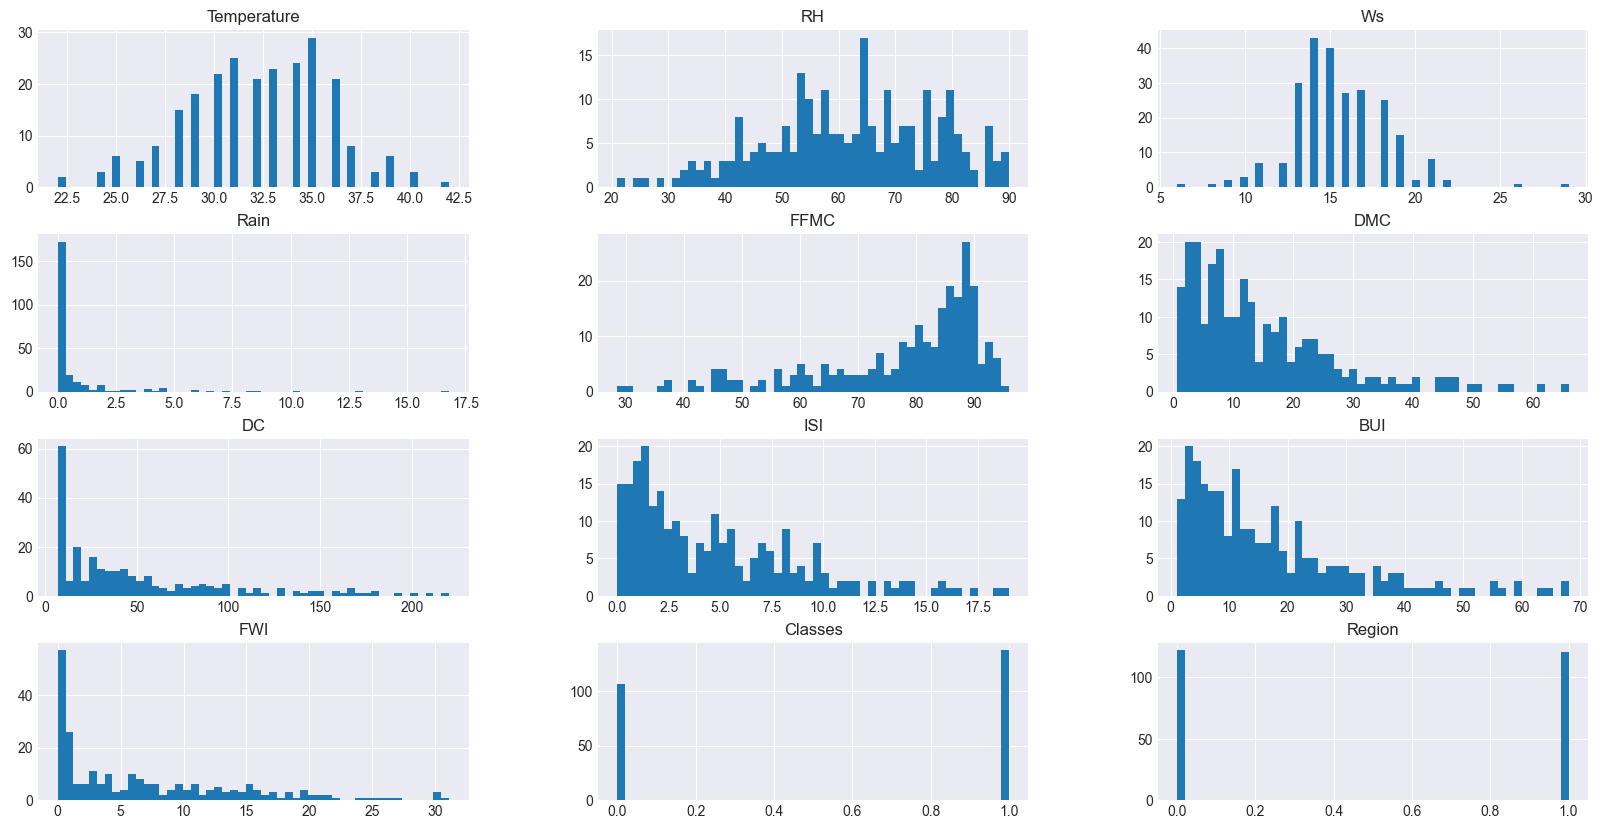

In [23]:
##PLOTING DENSITYS OF ALL THE FEATURES
plt.style.use('seaborn-v0_8-darkgrid')
df_2.hist(bins=50,figsize=(20,10))
plt.show()

In [24]:
##Percentage for Piecahrt
percentage = df_2['Classes'].value_counts(normalize=True)*100
print(percentage)

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64


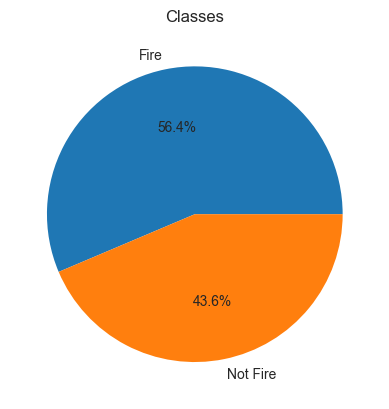

In [25]:
##Plotting Piechart
plt.style.use('seaborn-v0_8-darkgrid')
labels=['Fire','Not Fire']
plt.pie(percentage,labels=labels,autopct='%1.1f%%')
plt.title("Classes")
plt.show()

In [26]:
##CORRELATION
df_2.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

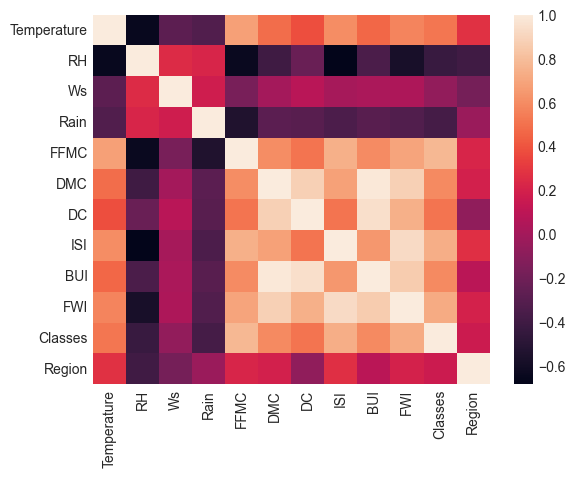

In [27]:
##Visualizing Correlation
sns.heatmap(df_2.corr())

<Axes: ylabel='FWI'>

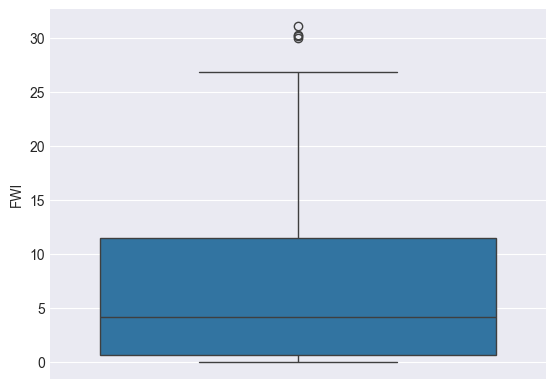

In [28]:
##Finfing Outliears with Boxplot
sns.boxplot(df_2['FWI'])

Text(0.5, 1.0, 'Fire Analysis Bajaiya Region')

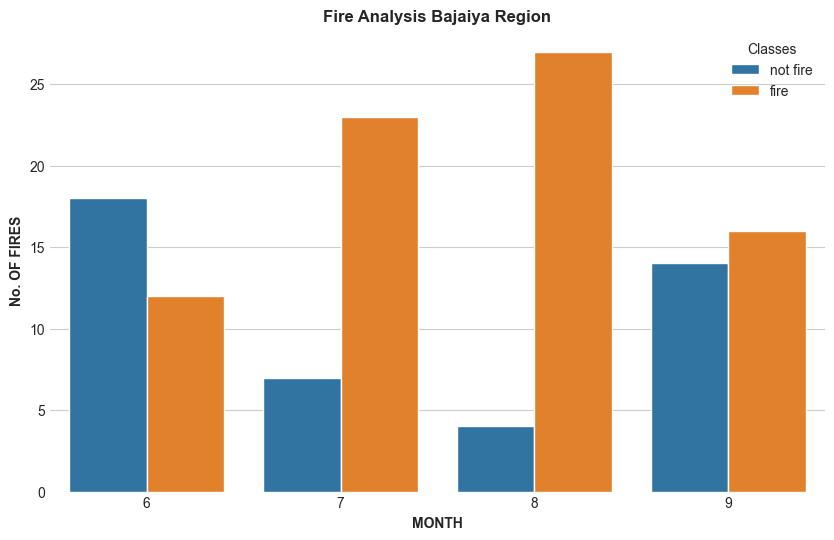

In [29]:
###Monthly Fire Analysis
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df_bajaiya = df.loc[df['Region']==1]
sns.set_style('whitegrid')
plt.subplots(figsize=(10,6))
sns.countplot(data=df_bajaiya,x='month',hue='Classes')
plt.xlabel('MONTH',weight ='bold')
plt.ylabel('No. OF FIRES',weight ='bold')
plt.title('Fire Analysis Bajaiya Region',weight = "bold")

Text(0.5, 1.0, 'Fire Analysis Sidi-Bel Abbes Region')

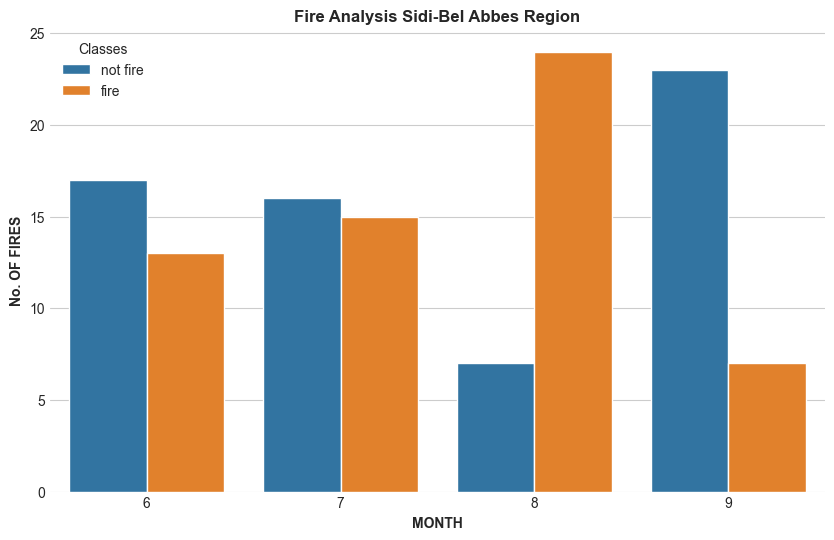

In [30]:
df_Sidi_Bel = df.loc[df['Region']==0]
sns.set_style('whitegrid')
plt.subplots(figsize=(10,6))
sns.countplot(x='month',hue = 'Classes',data = df_Sidi_Bel)
plt.xlabel('MONTH',weight ='bold')
plt.ylabel('No. OF FIRES',weight ='bold')
plt.title('Fire Analysis Sidi-Bel Abbes Region',weight = "bold")





### Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

### Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

### Less Fires was on September